In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_saud = pd.read_csv('./data/2020-12-05-dataComBairro.csv')
data_saud

DT_NOTIFIC                                   ID_UNIDADE  NU_IDADE_N  \
0       2019-01-02                     HOSPITAL BOSQUE DA SAUDE          27   
1       2019-02-11                     HOSPITAL BOSQUE DA SAUDE          40   
2       2019-02-18                     HOSPITAL BOSQUE DA SAUDE          26   
3       2019-03-14                     HOSPITAL BOSQUE DA SAUDE          23   
4       2019-03-23                     HOSPITAL BOSQUE DA SAUDE          22   
...            ...                                          ...         ...   
113803  2020-09-07  CIA DA CONSULTA CLINICA MEDICA UNID TATUAPE          62   
113804  2020-09-15                               AMA J SAO LUIZ          64   
113805  2020-09-30                                 HUMANA MAGNA          86   
113806  2020-10-01                               UBS PQ DO LAGO          66   
113807  2020-10-17                    CENTRO MEDICO SAO GABRIEL          54   

         CS_RACA FATOR_RISC  TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  ...  \
0         BRANCA        NaN    0.0       1.0        0   0.0         NaN  ...   
1       IGNORADO        NaN    1.0       1.0        0   0.0         NaN  ...   
2       IGNORADO        NaN    0.0       0.0        0   0.0         0.0  ...   
3         BRANCA        NaN    1.0       1.0        0   0.0         NaN  ...   
4          PARDA        NaN    1.0       1.0        0   0.0         NaN  ...   
...          ...        ...    ...       ...      ...   ...         ...  ...   
113803  IGNORADO          S    1.0       1.0        0   2.0         0.0  ...   
113804     PARDA          S    0.0       1.0        1   2.0         0.0  ...   
113805    BRANCA          S    1.0       1.0        0   2.0         0.0  ...   
113806    BRANCA          S    0.0       1.0        1   2.0         0.0  ...   
113807  IGNORADO          S    1.0       1.0        0   2.0         1.0  ...   

        HOSPITAL  UTI  CLASSI_FIN  EVOLUCAO  INFLUENZA  OUTRO_VIRUS  \
0            1.0  1.0         4.0     OBITO        0.0          0.0   
1            1.0  0.0         4.0       NaN        0.0          0.0   
2            1.0  0.0         4.0       NaN        0.0          0.0   
3            1.0  1.0         4.0      CURA        0.0          0.0   
4            1.0  1.0         4.0      CURA        0.0          0.0   
...          ...  ...         ...       ...        ...          ...   
113803       1.0  1.0         4.0      CURA        0.0          0.0   
113804       0.0  NaN         5.0     OBITO        0.0          0.0   
113805       1.0  0.0         4.0     OBITO        0.0          0.0   
113806       0.0  NaN         4.0     OBITO        0.0          0.0   
113807       0.0  NaN         4.0     OBITO        0.0          0.0   

       OUTRO_AGENTE  N_ESPECIFICADO  COVID19                            Bairro  
0               0.0             1.0      0.0                             Saúde  
1               0.0             1.0      0.0                             Saúde  
2               0.0             1.0      0.0                             Saúde  
3               0.0             1.0      0.0                             Saúde  
4               0.0             1.0      0.0                             Saúde  
...             ...             ...      ...                               ...  
113803          0.0             1.0      0.0                           Tatuapé  
113804          0.0             0.0      1.0                 Jardim Casablanca  
113805          0.0             1.0      0.0  Chácara Santo Antônio (Zona Sul)  
113806          0.0             1.0      0.0                    Parque do Lago  
113807          0.0             1.0      0.0                   Penha de França  

[113808 rows x 23 columns]

In [3]:
data_saud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113808 entries, 0 to 113807
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DT_NOTIFIC      113808 non-null  object 
 1   ID_UNIDADE      113808 non-null  object 
 2   NU_IDADE_N      113808 non-null  int64  
 3   CS_RACA         100368 non-null  object 
 4   FATOR_RISC      110380 non-null  object 
 5   TOSSE           99563 non-null   float64
 6   DISPNEIA        98523 non-null   float64
 7   MIALGIA         113808 non-null  int64  
 8   ASMA            39710 non-null   float64
 9   PNEUMOPATI      37874 non-null   float64
 10  TABAGISMO       113808 non-null  int64  
 11  ANTIVIRAL       102789 non-null  float64
 12  VACINA          88891 non-null   float64
 13  HOSPITAL        112814 non-null  float64
 14  UTI             101277 non-null  float64
 15  CLASSI_FIN      113808 non-null  float64
 16  EVOLUCAO        104221 non-null  object 
 17  INFLUENZA 

In [4]:
cluster_0 = data_saud[['DT_NOTIFIC', 'Bairro', 'COVID19', 'INFLUENZA','OUTRO_VIRUS','OUTRO_AGENTE','N_ESPECIFICADO','HOSPITAL','UTI','EVOLUCAO', 'NU_IDADE_N', 'FATOR_RISC']]
cluster_0.DT_NOTIFIC = pd.to_datetime(cluster_0.DT_NOTIFIC, infer_datetime_format=True)
cluster_0.head()

C:\Users\User\anaconda3\envs\DataScience\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


DT_NOTIFIC Bairro  COVID19  INFLUENZA  OUTRO_VIRUS  OUTRO_AGENTE  \
0 2019-01-02  Saúde      0.0        0.0          0.0           0.0   
1 2019-02-11  Saúde      0.0        0.0          0.0           0.0   
2 2019-02-18  Saúde      0.0        0.0          0.0           0.0   
3 2019-03-14  Saúde      0.0        0.0          0.0           0.0   
4 2019-03-23  Saúde      0.0        0.0          0.0           0.0   

   N_ESPECIFICADO  HOSPITAL  UTI EVOLUCAO  NU_IDADE_N FATOR_RISC  
0             1.0       1.0  1.0    OBITO          27        NaN  
1             1.0       1.0  0.0      NaN          40        NaN  
2             1.0       1.0  0.0      NaN          26        NaN  
3             1.0       1.0  1.0     CURA          23        NaN  
4             1.0       1.0  1.0     CURA          22        NaN

In [5]:
transform = pd.read_csv('./data/bairros_Distritos.csv', index_col=0)
cluster_1 = pd.merge(cluster_0,transform, left_on='Bairro', right_index=True)
cluster_1.drop(['Bairro'], axis = 1,inplace = True)
cluster_1.head()

DT_NOTIFIC  COVID19  INFLUENZA  OUTRO_VIRUS  OUTRO_AGENTE  N_ESPECIFICADO  \
0 2019-01-02      0.0        0.0          0.0           0.0             1.0   
1 2019-02-11      0.0        0.0          0.0           0.0             1.0   
2 2019-02-18      0.0        0.0          0.0           0.0             1.0   
3 2019-03-14      0.0        0.0          0.0           0.0             1.0   
4 2019-03-23      0.0        0.0          0.0           0.0             1.0   

   HOSPITAL  UTI EVOLUCAO  NU_IDADE_N FATOR_RISC Distrito  
0       1.0  1.0    OBITO          27        NaN    SAUDE  
1       1.0  0.0      NaN          40        NaN    SAUDE  
2       1.0  0.0      NaN          26        NaN    SAUDE  
3       1.0  1.0     CURA          23        NaN    SAUDE  
4       1.0  1.0     CURA          22        NaN    SAUDE

In [6]:
gdf = gpd.read_file('./data/DEINFO_DISTRITO.shp')
gdf2 = gdf[['NOME_DIST','COD_DIST']]
gdf.NOME_DIST = gdf.NOME_DIST.apply(lambda x: x.replace("JD", 'JARDIM'))
gdf.NOME_DIST = gdf.NOME_DIST.apply(lambda x: x.replace("CID", 'CIDADE'))
gdf.NOME_DIST.unique()

array(['JOSE BONIFACIO', 'JARDIM SAO LUIS', 'ARTUR ALVIM', 'JAGUARA',
       'VILA PRUDENTE', 'JAGUARE', 'JARAGUA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'LAJEADO', 'LAPA', 'LIBERDADE', 'LIMAO',
       'VILA MEDEIROS', 'JARDIM ANGELA', 'PARELHEIROS', 'VILA SONIA',
       'AGUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'BARRA FUNDA', 'BELA VISTA', 'BELEM', 'BOM RETIRO', 'BRAS',
       'BRASILANDIA', 'BUTANTA', 'CACHOEIRINHA', 'CAMBUCI', 'CAMPO BELO',
       'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA', 'CAPAO REDONDO',
       'CARRAO', 'CASA VERDE', 'CIDADE ADEMAR', 'CIDADE DUTRA',
       'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLACAO', 'CURSINO',
       'ERMELINO MATARAZZO', 'FREGUESIA DO O', 'GRAJAU', 'GUAIANASES',
       'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI', 'ITAIM PAULISTA', 'ITAQUERA',
       'JABAQUARA', 'JACANA', 'MANDAQUI', 'MARSILAC', 'MOEMA', 'MOOCA',
       'MORUMBI', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIR

In [7]:
cluster_2 = pd.merge(cluster_1,gdf2, right_on='NOME_DIST', left_on='Distrito')
cluster_2.drop(['NOME_DIST'], axis = 1,inplace = True)
cluster_2.head()

DT_NOTIFIC  COVID19  INFLUENZA  OUTRO_VIRUS  OUTRO_AGENTE  N_ESPECIFICADO  \
0 2019-01-02      0.0        0.0          0.0           0.0             1.0   
1 2019-02-11      0.0        0.0          0.0           0.0             1.0   
2 2019-02-18      0.0        0.0          0.0           0.0             1.0   
3 2019-03-14      0.0        0.0          0.0           0.0             1.0   
4 2019-03-23      0.0        0.0          0.0           0.0             1.0   

   HOSPITAL  UTI EVOLUCAO  NU_IDADE_N FATOR_RISC Distrito COD_DIST  
0       1.0  1.0    OBITO          27        NaN    SAUDE       77  
1       1.0  0.0      NaN          40        NaN    SAUDE       77  
2       1.0  0.0      NaN          26        NaN    SAUDE       77  
3       1.0  1.0     CURA          23        NaN    SAUDE       77  
4       1.0  1.0     CURA          22        NaN    SAUDE       77

In [8]:
cluster_3 = cluster_2.dropna()
cluster_3

DT_NOTIFIC  COVID19  INFLUENZA  OUTRO_VIRUS  OUTRO_AGENTE  \
12    2020-01-07      0.0        0.0          0.0           0.0   
13    2020-02-19      0.0        0.0          0.0           0.0   
14    2020-02-26      0.0        0.0          0.0           0.0   
15    2020-02-27      0.0        0.0          0.0           0.0   
16    2020-03-07      0.0        0.0          0.0           0.0   
...          ...      ...        ...          ...           ...   
99861 2020-06-01      1.0        0.0          0.0           0.0   
99863 2020-07-13      1.0        0.0          0.0           0.0   
99869 2020-05-21      1.0        0.0          0.0           0.0   
99873 2020-10-20      1.0        0.0          0.0           0.0   
99876 2020-09-30      0.0        0.0          0.0           0.0   

       N_ESPECIFICADO  HOSPITAL  UTI  EVOLUCAO  NU_IDADE_N FATOR_RISC  \
12                1.0       1.0  1.0      CURA           5          S   
13                1.0       1.0  1.0      CURA           6          N   
14                1.0       1.0  0.0      CURA           9          N   
15                1.0       1.0  0.0      CURA           1          S   
16                1.0       1.0  9.0  IGNORADO          40          S   
...               ...       ...  ...       ...         ...        ...   
99861             0.0       1.0  0.0      CURA          35          N   
99863             0.0       1.0  1.0     OBITO          45          N   
99869             0.0       1.0  9.0      CURA          60          S   
99873             0.0       1.0  0.0     OBITO          76          N   
99876             1.0       1.0  0.0     OBITO          86          S   

         Distrito COD_DIST  
12          SAUDE       77  
13          SAUDE       77  
14          SAUDE       77  
15          SAUDE       77  
16          SAUDE       77  
...           ...      ...  
99861    CANGAIBA       18  
99863    CANGAIBA       18  
99869  ANHANGUERA        3  
99873  CASA VERDE       21  
99876      CARRAO       20  

[78448 rows x 13 columns]

In [9]:
cluster_3a = cluster_3[['COD_DIST','EVOLUCAO','COVID19','INFLUENZA','OUTRO_VIRUS','OUTRO_AGENTE','N_ESPECIFICADO','HOSPITAL','UTI']].groupby([cluster_3.DT_NOTIFIC.dt.month,'COD_DIST','EVOLUCAO']).sum()
cluster_3b = cluster_3[['COD_DIST','EVOLUCAO','NU_IDADE_N']].groupby([cluster_3.DT_NOTIFIC.dt.month,'COD_DIST','EVOLUCAO']).mean()
cluster_4 = pd.merge(cluster_3a,cluster_3b, right_index=True, left_index=True)
cluster_4 = cluster_4.reset_index()
cluster_4

DT_NOTIFIC COD_DIST  EVOLUCAO  COVID19  INFLUENZA  OUTRO_VIRUS  \
0              1       26      CURA      0.0        1.0          1.0   
1              1       28      CURA      0.0        0.0          0.0   
2              1       28     OBITO      0.0        0.0          0.0   
3              1       29  IGNORADO      0.0        0.0          0.0   
4              1       29     OBITO      0.0        0.0          0.0   
...          ...      ...       ...      ...        ...          ...   
1261          11       89      CURA     10.0        0.0          0.0   
1262          11       89  IGNORADO     12.0        0.0          0.0   
1263          11       89     OBITO      2.0        0.0          0.0   
1264          11       90      CURA     23.0        0.0          0.0   
1265          11       90     OBITO      8.0        0.0          0.0   

      OUTRO_AGENTE  N_ESPECIFICADO  HOSPITAL   UTI  NU_IDADE_N  
0              0.0             3.0       5.0   4.0    7.200000  
1              0.0             1.0       1.0   1.0    6.000000  
2              0.0             1.0       1.0   1.0   21.000000  
3              0.0             1.0       1.0   1.0   68.000000  
4              0.0             1.0       1.0   1.0   22.000000  
...            ...             ...       ...   ...         ...  
1261           0.0             2.0      12.0   4.0   42.083333  
1262           0.0             4.0      16.0  11.0   55.812500  
1263           0.0             2.0       4.0   3.0   62.500000  
1264           0.0            37.0      60.0  18.0   47.100000  
1265           0.0             2.0      10.0   8.0   75.800000  

[1266 rows x 11 columns]

In [10]:
cluster_4[cluster_4.columns[0:]].corr().style.background_gradient(cmap='RdBu')

<AxesSubplot:xlabel='COD_DIST', ylabel='N_ESPECIFICADO'>

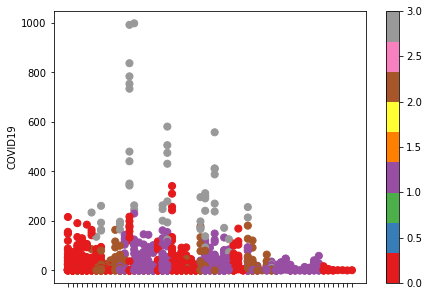

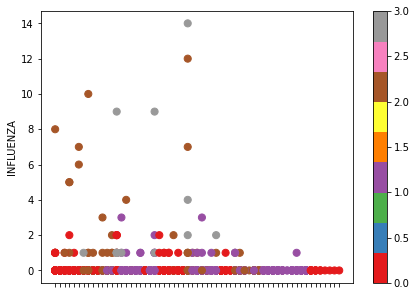

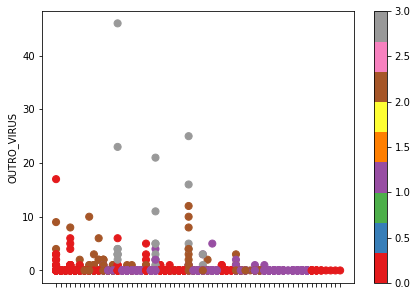

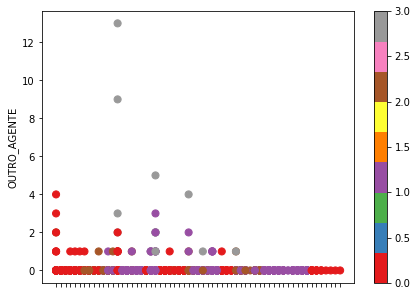

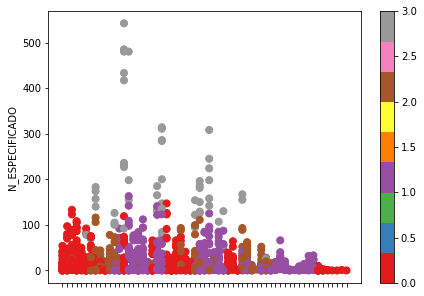

In [11]:
dfX = cluster_4[['COVID19', 'INFLUENZA', 'OUTRO_VIRUS','OUTRO_AGENTE', 'N_ESPECIFICADO', 'HOSPITAL','UTI','NU_IDADE_N','COD_DIST']]

dfX_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(dfX), 
                  index = dfX.index, 
                  columns=dfX.columns)

kmeans2 = KMeans(n_clusters =4, random_state = 42)  
kmeans2.fit(dfX_norm) 
cluster_4['Agrupamento'] = kmeans2.labels_

cluster_4.plot.scatter(x='COD_DIST', y='COVID19', s = 50, c = kmeans2.labels_, colormap='Set1', figsize=(7,5))
cluster_4.plot.scatter(x='COD_DIST', y='INFLUENZA', s = 50, c = kmeans2.labels_, colormap='Set1', figsize=(7,5))
cluster_4.plot.scatter(x='COD_DIST', y='OUTRO_VIRUS', s = 50, c = kmeans2.labels_, colormap='Set1', figsize=(7,5))
cluster_4.plot.scatter(x='COD_DIST', y='OUTRO_AGENTE', s = 50, c = kmeans2.labels_, colormap='Set1', figsize=(7,5))
cluster_4.plot.scatter(x='COD_DIST', y='N_ESPECIFICADO', s = 50, c = kmeans2.labels_, colormap='Set1', figsize=(7,5))

<AxesSubplot:xlabel='NU_IDADE_N', ylabel='HOSPITAL'>

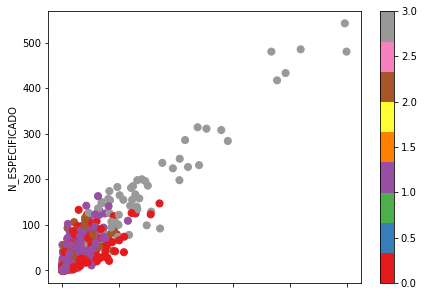

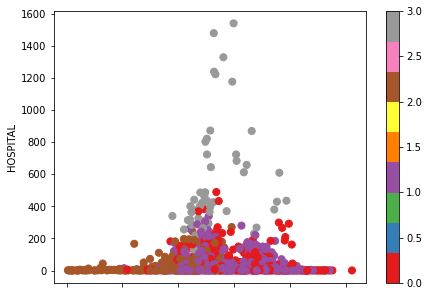

In [12]:
cluster_4.plot.scatter(x='COVID19', y='N_ESPECIFICADO', s = 50, c = kmeans2.labels_, colormap='Set1', figsize=(7,5))
cluster_4.plot.scatter(x='NU_IDADE_N', y='HOSPITAL', s = 50, c = kmeans2.labels_, colormap='Set1', figsize=(7,5))

# Comparação mês a mês

cluster_T
gdf

In [27]:
cluster_Ta = cluster_1[['Distrito','EVOLUCAO','COVID19','INFLUENZA','OUTRO_VIRUS','OUTRO_AGENTE','N_ESPECIFICADO','HOSPITAL','UTI']].groupby(['EVOLUCAO','Distrito',cluster_3.DT_NOTIFIC.dt.month]).sum()
cluster_Ta = cluster_Ta.reset_index(level='DT_NOTIFIC')
#cluster_T = cluster_T.reset_index()
cluster_Ta[['DT_NOTIFIC''COVID19','INFLUENZA','OUTRO_VIRUS','OUTRO_AGENTE','N_ESPECIFICADO','HOSPITAL','UTI']].groupby(level=-1)['DT_NOTIFIC'].cumsum().head(50)

KeyError: 'Column not found: DT_NOTIFIC'

In [ ]:
cluster_T1 = pd.merge(gdf,cluster_T, left_on='NOME_DIST', right_on='Distrito', how='left')
cluster_T1

In [ ]:
janeiro = cluster_T1[cluster_T1['DT_NOTIFIC']<1]
fevereiro = cluster_T1[cluster_T1['DT_NOTIFIC']<2]
marco = cluster_T1[cluster_T1['DT_NOTIFIC']<3]
abril = cluster_T1[cluster_T1['DT_NOTIFIC']<4]
maio = cluster_T1[cluster_T1['DT_NOTIFIC']<5]
junho = cluster_T1[cluster_T1['DT_NOTIFIC']<6]
julho = cluster_T1[cluster_T1['DT_NOTIFIC']==7]
agosto = cluster_T1[cluster_T1['DT_NOTIFIC']==8]
setembro = cluster_T1[cluster_T1['DT_NOTIFIC']==9]
outubro = cluster_T1[cluster_T1['DT_NOTIFIC']==10]
novembro = cluster_T1[cluster_T1['DT_NOTIFIC']==11]

In [ ]:
janeiro.plot(column='HOSPITAL', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(5,5))
fevereiro.plot(column='HOSPITAL', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(5,5))
marco.plot(column='HOSPITAL', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(5,5))
abril.plot(column='HOSPITAL', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(5,5))
maio.plot(column='HOSPITAL', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(5,5))
junho.plot(column='HOSPITAL', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(5,5))
julho.plot(column='HOSPITAL', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(5,5))
agosto.plot(column='HOSPITAL', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(5,5))
plt.show()